# Regression - FFNN - one_hot + normalize

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import MinMaxScaler

In [40]:
df = pd.read_csv('reg_data/abalone.data',
                 names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])

In [4]:
from sklearn.model_selection import train_test_split

In [6]:
dummy = pd.get_dummies(df['Sex'])
dummy.head()

df = pd.concat([df.iloc[:,0], dummy, df.iloc[:,1:]], axis=1)

X = df.iloc[:,1:-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [7]:
df.head()

,Sex,F,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
scaler = MinMaxScaler()
scaler.fit(X[:,3:])

X_train_scaled = scaler.transform(X_train[:,3:])
X_test_scaled = scaler.transform(X_test[:,3:])

In [9]:
X_train_scaled[0]

array([0.64189189, 0.63865546, 0.11061947, 0.26173189, 0.23335575,
       0.2080316 , 0.20378675])

In [10]:
X_train_scaled = np.concatenate((X_train[:,:3], X_train_scaled), axis=1)
X_test_scaled = np.concatenate((X_test[:,:3], X_test_scaled), axis=1)

In [11]:
X_train_scaled[0]

array([0.        , 1.        , 0.        , 0.64189189, 0.63865546,
       0.11061947, 0.26173189, 0.23335575, 0.2080316 , 0.20378675])

In [12]:
y_scaler = MinMaxScaler()
y_scaler.fit(y.reshape(-1,1))

y_train_scaled = y_scaler.transform(y_train.reshape(-1,1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1,1))

In [13]:
y_train_scaled[:5]

array([[0.28571429],
       [0.32142857],
       [0.17857143],
       [0.21428571],
       [0.46428571]])

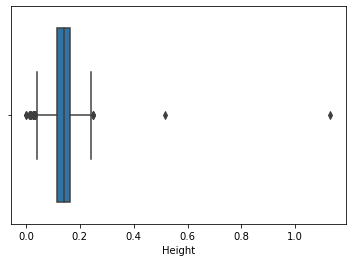

In [37]:
sns.boxplot(df['Height'])

### feature selection

In [41]:
dummy = pd.get_dummies(df['Sex'])
dummy.head()

df = pd.concat([df.iloc[:,0], dummy, df.iloc[:,1:]], axis=1)

X = df.iloc[:,1:-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [42]:
df.head()

,Sex,F,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [43]:
scaler = MinMaxScaler()
scaler.fit(X[:,3:])

X_train_scaled = scaler.transform(X_train[:,3:])
X_test_scaled = scaler.transform(X_test[:,3:])

In [44]:
X_train_scaled[0]

array([0.64189189, 0.63865546, 0.11061947, 0.26173189, 0.23335575,
       0.2080316 , 0.20378675])

In [56]:
X_train_scaled = np.concatenate((X_train[:,:3], X_train_scaled), axis=1)
X_test_scaled = np.concatenate((X_test[:,:3], X_test_scaled), axis=1)

In [57]:
X_train_scaled[0]

array([0.        , 1.        , 0.        , 0.64189189, 0.63865546,
       0.11061947, 0.26173189, 0.23335575, 0.2080316 , 0.20378675])

In [45]:
y_scaler = MinMaxScaler()
y_scaler.fit(y.reshape(-1,1))

y_train_scaled = y_scaler.transform(y_train.reshape(-1,1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1,1))

In [46]:
y_train_scaled[:5]

array([[0.28571429],
       [0.32142857],
       [0.17857143],
       [0.21428571],
       [0.46428571]])

### feature selection

In [59]:
X_train_scaled = X_train_scaled[:,:-1]
X_test_scaled = X_test_scaled[:,:-1]

## Build Model

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [28]:
model = Sequential()
model.add(Dense(32, input_shape=(10,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

In [29]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 129       
Total params: 10,913
Trainable params: 10,913
Non-trainable params: 0
_________________________________________________________________


In [28]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 192us/sample - loss: 83.4325 - mae: 8.4574 - val_loss: 48.8903 - val_mae: 5.9600
Epoch 2/100
3341/3341 [==============================] - 0s 47us/sample - loss: 32.8104 - mae: 4.6206 - val_loss: 22.6109 - val_mae: 3.7460
Epoch 3/100
3341/3341 [==============================] - 0s 71us/sample - loss: 13.8085 - mae: 2.7275 - val_loss: 7.4541 - val_mae: 1.9654
Epoch 4/100
3341/3341 [==============================] - 0s 52us/sample - loss: 6.8978 - mae: 1.8350 - val_loss: 6.5149 - val_mae: 1.8333
Epoch 5/100
3341/3341 [==============================] - 0s 46us/sample - loss: 6.0945 - mae: 1.7606 - val_loss: 6.1157 - val_mae: 1.7453
Epoch 6/100
3341/3341 [==============================] - 0s 46us/sample - loss: 5.5813 - mae: 1.6785 - val_loss: 5.7151 - val_mae: 1.7100
Epoch 7/100
3341/3341 [==============================] - 0s 46us/sample - loss: 5.3296 - mae: 1.6454 - val_loss: 5.6127

In [32]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [33]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.543296066834196
RMSE :      2.131500895339759
r2_score :  0.5951314340395566


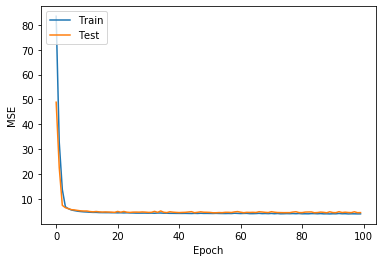

In [34]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## minmax

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

In [15]:
model = Sequential()
model.add(Dense(32, input_shape=(10,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

In [16]:
def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 10,913
Trainable params: 10,913
Non-trainable params: 0
_________________________________________________________________


In [18]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train_scaled, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test_scaled])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 2s 483us/sample - loss: 0.0131 - mae: 0.0861 - coeff: -0.0513 - val_loss: 0.0094 - val_mae: 0.0710 - val_coeff: 0.3388
Epoch 2/100
3341/3341 [==============================] - 0s 61us/sample - loss: 0.0085 - mae: 0.0659 - coeff: 0.3470 - val_loss: 0.0085 - val_mae: 0.0636 - val_coeff: 0.4125
Epoch 3/100
3341/3341 [==============================] - 0s 77us/sample - loss: 0.0076 - mae: 0.0627 - coeff: 0.4174 - val_loss: 0.0079 - val_mae: 0.0632 - val_coeff: 0.4482
Epoch 4/100
3341/3341 [==============================] - 0s 75us/sample - loss: 0.0071 - mae: 0.0604 - coeff: 0.4528 - val_loss: 0.0077 - val_mae: 0.0639 - val_coeff: 0.4674
Epoch 5/100
3341/3341 [==============================] - 0s 58us/sample - loss: 0.0068 - mae: 0.0592 - coeff: 0.4852 - val_loss: 0.0069 - val_mae: 0.0583 - val_coeff: 0.5205
Epoch 6/100
3341/3341 [==============================] - 0s 54us/sample - loss: 0

3341/3341 [==============================] - 0s 67us/sample - loss: 0.0060 - mae: 0.0558 - coeff: 0.5416 - val_loss: 0.0064 - val_mae: 0.0535 - val_coeff: 0.5490
Epoch 48/100
3341/3341 [==============================] - 0s 57us/sample - loss: 0.0055 - mae: 0.0525 - coeff: 0.5761 - val_loss: 0.0059 - val_mae: 0.0548 - val_coeff: 0.5830
Epoch 49/100
3341/3341 [==============================] - 0s 66us/sample - loss: 0.0055 - mae: 0.0525 - coeff: 0.5605 - val_loss: 0.0064 - val_mae: 0.0537 - val_coeff: 0.5515
Epoch 50/100
3341/3341 [==============================] - 0s 73us/sample - loss: 0.0056 - mae: 0.0532 - coeff: 0.5628 - val_loss: 0.0060 - val_mae: 0.0535 - val_coeff: 0.5765
Epoch 51/100
3341/3341 [==============================] - 0s 58us/sample - loss: 0.0054 - mae: 0.0522 - coeff: 0.5803 - val_loss: 0.0060 - val_mae: 0.0539 - val_coeff: 0.5754
Epoch 52/100
3341/3341 [==============================] - 0s 61us/sample - loss: 0.0054 - mae: 0.0524 - coeff: 0.5799 - val_loss: 0.0060 -

Epoch 94/100
3341/3341 [==============================] - 0s 57us/sample - loss: 0.0053 - mae: 0.0520 - coeff: 0.5911 - val_loss: 0.0060 - val_mae: 0.0551 - val_coeff: 0.5757
Epoch 95/100
3341/3341 [==============================] - 0s 71us/sample - loss: 0.0053 - mae: 0.0518 - coeff: 0.5806 - val_loss: 0.0059 - val_mae: 0.0531 - val_coeff: 0.5835
Epoch 96/100
3341/3341 [==============================] - 0s 62us/sample - loss: 0.0053 - mae: 0.0513 - coeff: 0.5727 - val_loss: 0.0061 - val_mae: 0.0594 - val_coeff: 0.5601
Epoch 97/100
3341/3341 [==============================] - 0s 60us/sample - loss: 0.0060 - mae: 0.0559 - coeff: 0.5321 - val_loss: 0.0079 - val_mae: 0.0593 - val_coeff: 0.4446
Epoch 98/100
3341/3341 [==============================] - 0s 63us/sample - loss: 0.0060 - mae: 0.0552 - coeff: 0.5427 - val_loss: 0.0062 - val_mae: 0.0534 - val_coeff: 0.5662
Epoch 99/100
3341/3341 [==============================] - 0s 58us/sample - loss: 0.0056 - mae: 0.0534 - coeff: 0.5606 - val_l

In [24]:
y_pred_scaled = model.predict(X_test_scaled)

In [25]:
y_pred = y_scaler.inverse_transform(y_pred_scaled)

## Evaluate

In [27]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.571373627400056
RMSE :      2.1380770864026526
r2_score :  0.5926293471152748


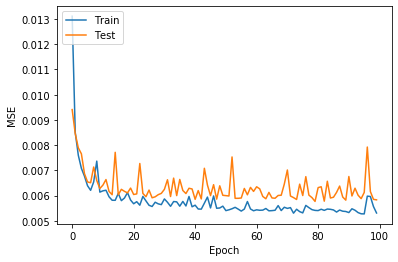

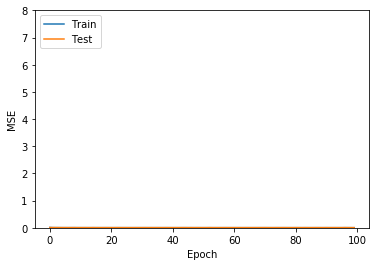

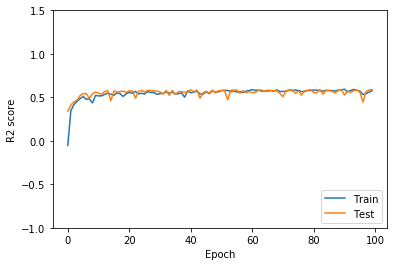

In [21]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

## minmax 300 epochs

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

In [28]:
model = Sequential()
model.add(Dense(32, input_shape=(10,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

In [29]:
def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 10,913
Trainable params: 10,913
Non-trainable params: 0
_________________________________________________________________


In [31]:
epochs = 300
batch_size=128

history = model.fit(X_train_scaled, y_train_scaled, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test_scaled])

Train on 3341 samples, validate on 836 samples
Epoch 1/300
3341/3341 [==============================] - 1s 244us/sample - loss: 0.0183 - mae: 0.0999 - coeff: -0.4082 - val_loss: 0.0090 - val_mae: 0.0689 - val_coeff: 0.3741
Epoch 2/300
3341/3341 [==============================] - 0s 84us/sample - loss: 0.0083 - mae: 0.0664 - coeff: 0.3332 - val_loss: 0.0085 - val_mae: 0.0638 - val_coeff: 0.4080
Epoch 3/300
3341/3341 [==============================] - 0s 75us/sample - loss: 0.0077 - mae: 0.0624 - coeff: 0.4119 - val_loss: 0.0081 - val_mae: 0.0626 - val_coeff: 0.4346
Epoch 4/300
3341/3341 [==============================] - 0s 64us/sample - loss: 0.0073 - mae: 0.0611 - coeff: 0.4221 - val_loss: 0.0077 - val_mae: 0.0603 - val_coeff: 0.4633
Epoch 5/300
3341/3341 [==============================] - 0s 51us/sample - loss: 0.0071 - mae: 0.0604 - coeff: 0.4556 - val_loss: 0.0078 - val_mae: 0.0595 - val_coeff: 0.4588
Epoch 6/300
3341/3341 [==============================] - 0s 51us/sample - loss: 0

3341/3341 [==============================] - 0s 58us/sample - loss: 0.0055 - mae: 0.0526 - coeff: 0.5688 - val_loss: 0.0068 - val_mae: 0.0566 - val_coeff: 0.5196
Epoch 48/300
3341/3341 [==============================] - 0s 51us/sample - loss: 0.0056 - mae: 0.0531 - coeff: 0.5704 - val_loss: 0.0061 - val_mae: 0.0537 - val_coeff: 0.5707
Epoch 49/300
3341/3341 [==============================] - 0s 49us/sample - loss: 0.0055 - mae: 0.0526 - coeff: 0.5691 - val_loss: 0.0059 - val_mae: 0.0550 - val_coeff: 0.5830
Epoch 50/300
3341/3341 [==============================] - 0s 61us/sample - loss: 0.0055 - mae: 0.0535 - coeff: 0.5735 - val_loss: 0.0063 - val_mae: 0.0548 - val_coeff: 0.5559
Epoch 51/300
3341/3341 [==============================] - 0s 49us/sample - loss: 0.0056 - mae: 0.0531 - coeff: 0.5700 - val_loss: 0.0060 - val_mae: 0.0535 - val_coeff: 0.5745
Epoch 52/300
3341/3341 [==============================] - 0s 45us/sample - loss: 0.0054 - mae: 0.0521 - coeff: 0.5608 - val_loss: 0.0062 -

Epoch 94/300
3341/3341 [==============================] - 0s 75us/sample - loss: 0.0054 - mae: 0.0519 - coeff: 0.5805 - val_loss: 0.0059 - val_mae: 0.0558 - val_coeff: 0.5803
Epoch 95/300
3341/3341 [==============================] - 0s 49us/sample - loss: 0.0054 - mae: 0.0520 - coeff: 0.5801 - val_loss: 0.0062 - val_mae: 0.0535 - val_coeff: 0.5618
Epoch 96/300
3341/3341 [==============================] - 0s 52us/sample - loss: 0.0053 - mae: 0.0519 - coeff: 0.5816 - val_loss: 0.0063 - val_mae: 0.0534 - val_coeff: 0.5588
Epoch 97/300
3341/3341 [==============================] - 0s 55us/sample - loss: 0.0055 - mae: 0.0529 - coeff: 0.5768 - val_loss: 0.0069 - val_mae: 0.0558 - val_coeff: 0.5179
Epoch 98/300
3341/3341 [==============================] - 0s 47us/sample - loss: 0.0053 - mae: 0.0515 - coeff: 0.5767 - val_loss: 0.0059 - val_mae: 0.0528 - val_coeff: 0.5855
Epoch 99/300
3341/3341 [==============================] - 0s 65us/sample - loss: 0.0054 - mae: 0.0520 - coeff: 0.5705 - val_l

3341/3341 [==============================] - 0s 56us/sample - loss: 0.0051 - mae: 0.0510 - coeff: 0.6013 - val_loss: 0.0058 - val_mae: 0.0525 - val_coeff: 0.5936
Epoch 141/300
3341/3341 [==============================] - 0s 57us/sample - loss: 0.0052 - mae: 0.0515 - coeff: 0.5899 - val_loss: 0.0062 - val_mae: 0.0532 - val_coeff: 0.5652
Epoch 142/300
3341/3341 [==============================] - 0s 47us/sample - loss: 0.0058 - mae: 0.0541 - coeff: 0.5404 - val_loss: 0.0062 - val_mae: 0.0542 - val_coeff: 0.5598
Epoch 143/300
3341/3341 [==============================] - 0s 63us/sample - loss: 0.0052 - mae: 0.0512 - coeff: 0.5971 - val_loss: 0.0059 - val_mae: 0.0550 - val_coeff: 0.5808
Epoch 144/300
3341/3341 [==============================] - 0s 48us/sample - loss: 0.0052 - mae: 0.0515 - coeff: 0.5925 - val_loss: 0.0058 - val_mae: 0.0531 - val_coeff: 0.5895
Epoch 145/300
3341/3341 [==============================] - 0s 57us/sample - loss: 0.0052 - mae: 0.0513 - coeff: 0.5963 - val_loss: 0.0

3341/3341 [==============================] - 0s 54us/sample - loss: 0.0051 - mae: 0.0504 - coeff: 0.5958 - val_loss: 0.0059 - val_mae: 0.0531 - val_coeff: 0.5859
Epoch 187/300
3341/3341 [==============================] - 0s 51us/sample - loss: 0.0050 - mae: 0.0503 - coeff: 0.6038 - val_loss: 0.0060 - val_mae: 0.0528 - val_coeff: 0.5764
Epoch 188/300
3341/3341 [==============================] - 0s 53us/sample - loss: 0.0051 - mae: 0.0508 - coeff: 0.6126 - val_loss: 0.0063 - val_mae: 0.0540 - val_coeff: 0.5561
Epoch 189/300
3341/3341 [==============================] - 0s 52us/sample - loss: 0.0050 - mae: 0.0505 - coeff: 0.6064 - val_loss: 0.0059 - val_mae: 0.0531 - val_coeff: 0.5837
Epoch 190/300
3341/3341 [==============================] - 0s 50us/sample - loss: 0.0050 - mae: 0.0503 - coeff: 0.6137 - val_loss: 0.0064 - val_mae: 0.0537 - val_coeff: 0.5500
Epoch 191/300
3341/3341 [==============================] - 0s 61us/sample - loss: 0.0051 - mae: 0.0512 - coeff: 0.5910 - val_loss: 0.0

Epoch 232/300
3341/3341 [==============================] - 0s 56us/sample - loss: 0.0049 - mae: 0.0497 - coeff: 0.6042 - val_loss: 0.0059 - val_mae: 0.0530 - val_coeff: 0.5854
Epoch 233/300
3341/3341 [==============================] - 0s 88us/sample - loss: 0.0049 - mae: 0.0503 - coeff: 0.6031 - val_loss: 0.0067 - val_mae: 0.0554 - val_coeff: 0.5326
Epoch 234/300
3341/3341 [==============================] - 0s 51us/sample - loss: 0.0051 - mae: 0.0507 - coeff: 0.5796 - val_loss: 0.0070 - val_mae: 0.0566 - val_coeff: 0.5107
Epoch 235/300
3341/3341 [==============================] - 0s 48us/sample - loss: 0.0052 - mae: 0.0508 - coeff: 0.6052 - val_loss: 0.0061 - val_mae: 0.0537 - val_coeff: 0.5753
Epoch 236/300
3341/3341 [==============================] - 0s 47us/sample - loss: 0.0049 - mae: 0.0499 - coeff: 0.6164 - val_loss: 0.0061 - val_mae: 0.0557 - val_coeff: 0.5735
Epoch 237/300
3341/3341 [==============================] - 0s 57us/sample - loss: 0.0049 - mae: 0.0503 - coeff: 0.6052 -

3341/3341 [==============================] - 0s 62us/sample - loss: 0.0048 - mae: 0.0493 - coeff: 0.6302 - val_loss: 0.0060 - val_mae: 0.0538 - val_coeff: 0.5792
Epoch 279/300
3341/3341 [==============================] - 0s 59us/sample - loss: 0.0047 - mae: 0.0490 - coeff: 0.6356 - val_loss: 0.0061 - val_mae: 0.0543 - val_coeff: 0.5781
Epoch 280/300
3341/3341 [==============================] - 0s 76us/sample - loss: 0.0047 - mae: 0.0490 - coeff: 0.6339 - val_loss: 0.0061 - val_mae: 0.0555 - val_coeff: 0.5733
Epoch 281/300
3341/3341 [==============================] - 0s 72us/sample - loss: 0.0050 - mae: 0.0510 - coeff: 0.6069 - val_loss: 0.0065 - val_mae: 0.0588 - val_coeff: 0.5437
Epoch 282/300
3341/3341 [==============================] - 0s 52us/sample - loss: 0.0050 - mae: 0.0507 - coeff: 0.6146 - val_loss: 0.0071 - val_mae: 0.0569 - val_coeff: 0.5071
Epoch 283/300
3341/3341 [==============================] - 0s 48us/sample - loss: 0.0049 - mae: 0.0506 - coeff: 0.6137 - val_loss: 0.0

In [32]:
y_pred_scaled = model.predict(X_test_scaled)

In [33]:
y_pred = y_scaler.inverse_transform(y_pred_scaled)

## Evaluate

In [34]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       5.000363073936254
RMSE :      2.236149161826253
r2_score :  0.5544006383812874


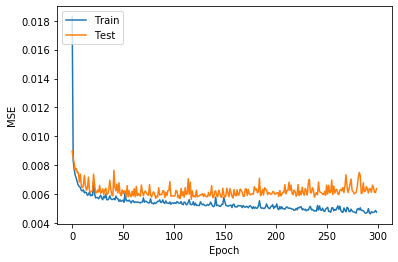

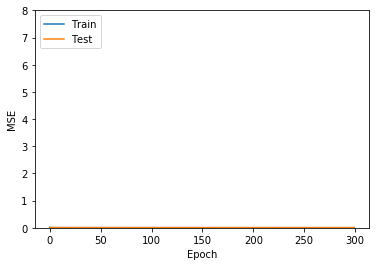

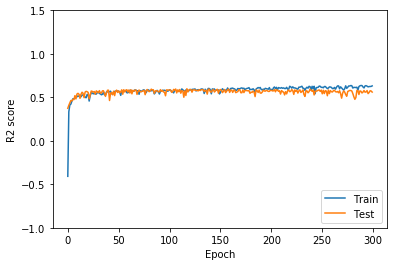

In [35]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

## minmax - feature selection

In [60]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

In [65]:
model = Sequential()
model.add(Dense(32, input_shape=(9,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

In [66]:
def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [67]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                320       
_________________________________________________________________
dense_17 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_18 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 129       
Total params: 10,881
Trainable params: 10,881
Non-trainable params: 0
_________________________________________________________________


In [68]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train_scaled, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test_scaled])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 224us/sample - loss: 0.0172 - mae: 0.0988 - coeff: -0.3299 - val_loss: 0.0096 - val_mae: 0.0743 - val_coeff: 0.3274
Epoch 2/100
3341/3341 [==============================] - 0s 50us/sample - loss: 0.0086 - mae: 0.0663 - coeff: 0.3329 - val_loss: 0.0091 - val_mae: 0.0643 - val_coeff: 0.3713
Epoch 3/100
3341/3341 [==============================] - 0s 51us/sample - loss: 0.0082 - mae: 0.0651 - coeff: 0.3532 - val_loss: 0.0088 - val_mae: 0.0639 - val_coeff: 0.3873
Epoch 4/100
3341/3341 [==============================] - 0s 55us/sample - loss: 0.0080 - mae: 0.0644 - coeff: 0.3767 - val_loss: 0.0086 - val_mae: 0.0644 - val_coeff: 0.4043
Epoch 5/100
3341/3341 [==============================] - 0s 51us/sample - loss: 0.0078 - mae: 0.0632 - coeff: 0.3954 - val_loss: 0.0084 - val_mae: 0.0639 - val_coeff: 0.4140
Epoch 6/100
3341/3341 [==============================] - 0s 75us/sample - loss: 0

3341/3341 [==============================] - 0s 45us/sample - loss: 0.0057 - mae: 0.0539 - coeff: 0.5573 - val_loss: 0.0066 - val_mae: 0.0557 - val_coeff: 0.5326
Epoch 48/100
3341/3341 [==============================] - 0s 49us/sample - loss: 0.0056 - mae: 0.0535 - coeff: 0.5667 - val_loss: 0.0065 - val_mae: 0.0558 - val_coeff: 0.5429
Epoch 49/100
3341/3341 [==============================] - 0s 44us/sample - loss: 0.0056 - mae: 0.0536 - coeff: 0.5705 - val_loss: 0.0067 - val_mae: 0.0579 - val_coeff: 0.5293
Epoch 50/100
3341/3341 [==============================] - 0s 41us/sample - loss: 0.0059 - mae: 0.0555 - coeff: 0.5483 - val_loss: 0.0070 - val_mae: 0.0569 - val_coeff: 0.5094
Epoch 51/100
3341/3341 [==============================] - 0s 44us/sample - loss: 0.0056 - mae: 0.0534 - coeff: 0.5714 - val_loss: 0.0064 - val_mae: 0.0547 - val_coeff: 0.5520
Epoch 52/100
3341/3341 [==============================] - 0s 42us/sample - loss: 0.0054 - mae: 0.0524 - coeff: 0.5803 - val_loss: 0.0066 -

Epoch 94/100
3341/3341 [==============================] - 0s 70us/sample - loss: 0.0054 - mae: 0.0523 - coeff: 0.5893 - val_loss: 0.0061 - val_mae: 0.0538 - val_coeff: 0.5716
Epoch 95/100
3341/3341 [==============================] - 0s 79us/sample - loss: 0.0054 - mae: 0.0522 - coeff: 0.5727 - val_loss: 0.0062 - val_mae: 0.0548 - val_coeff: 0.5641
Epoch 96/100
3341/3341 [==============================] - 0s 59us/sample - loss: 0.0055 - mae: 0.0530 - coeff: 0.5714 - val_loss: 0.0068 - val_mae: 0.0560 - val_coeff: 0.5229
Epoch 97/100
3341/3341 [==============================] - 0s 57us/sample - loss: 0.0054 - mae: 0.0524 - coeff: 0.5477 - val_loss: 0.0065 - val_mae: 0.0551 - val_coeff: 0.5443
Epoch 98/100
3341/3341 [==============================] - 0s 92us/sample - loss: 0.0055 - mae: 0.0528 - coeff: 0.5637 - val_loss: 0.0065 - val_mae: 0.0545 - val_coeff: 0.5450
Epoch 99/100
3341/3341 [==============================] - 0s 90us/sample - loss: 0.0055 - mae: 0.0531 - coeff: 0.5665 - val_l

In [69]:
y_pred_scaled = model.predict(X_test_scaled)

In [70]:
y_pred = y_scaler.inverse_transform(y_pred_scaled)

## Evaluate

In [71]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.873602265726244
RMSE :      2.2076236694070492
r2_score :  0.5656967251616796


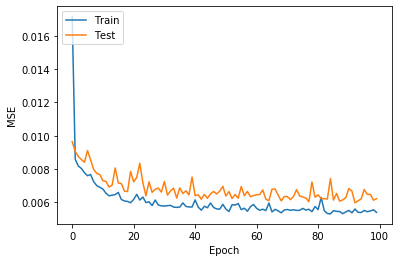

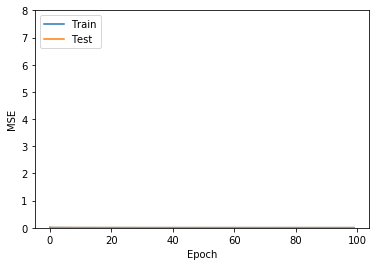

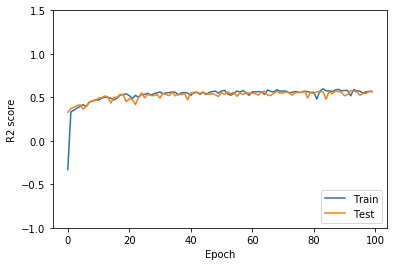

In [72]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()